In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from rpi_weather_display.providers import owmWeather
from rpi_weather_display import create_current_text, create_daily_text, create_hourly_plot, create_forecast_image, convert_plt_fig_to_pil, create_error_image

# Auto reload
%load_ext autoreload
%autoreload 2

# Set DPI
plt.rcParams['figure.dpi'] = 72

In [2]:
forecast = owmWeather(lat=52.494117, long=13.422371, api_key=os.environ["OWM_API_KEY"])

## Current weather plot

In [3]:
c_text = create_current_text(forecast.get_current_weather())

In [4]:
print(c_text)

Temperature: 8.8
Temperature feels like: 6.4
Description: few clouds
Rain: 0
Last update: 17:33


## Hourly plot

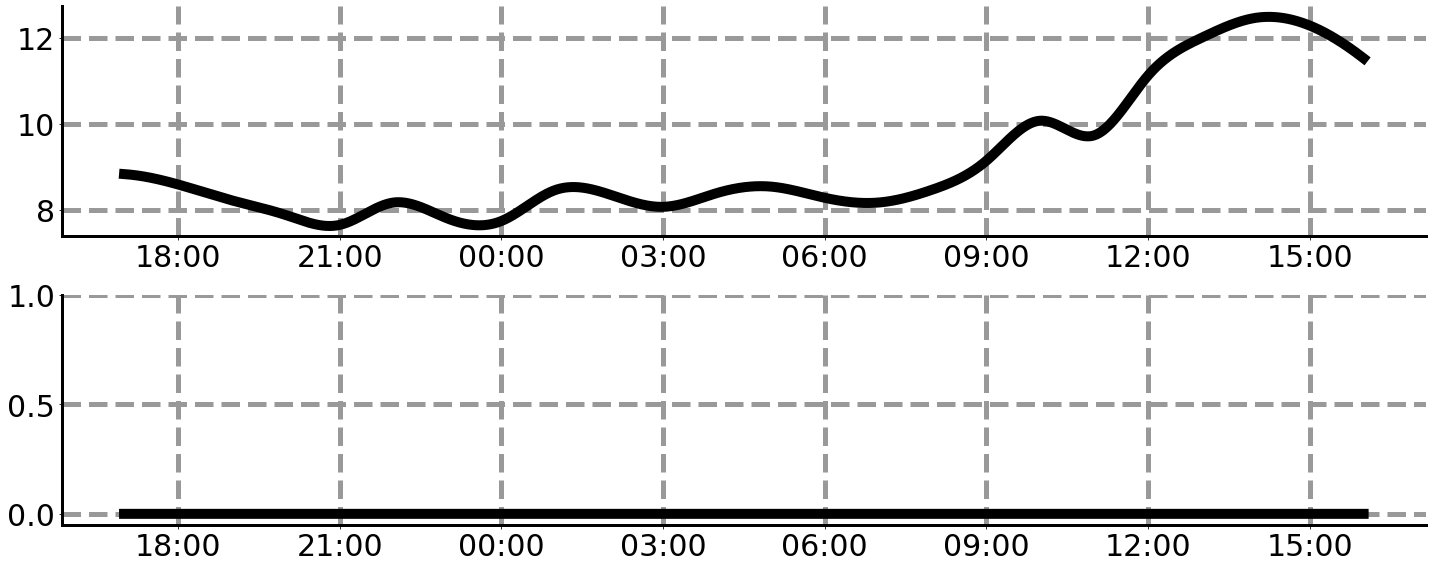

In [5]:
h_plot = create_hourly_plot(forecast.get_hourly_data())

## Daily weather plot

In [6]:
d_text = create_daily_text(forecast.get_daily_data())

In [7]:
print(d_text[0])

Today
Low: 6.22
High: 10.83
Rain: 0


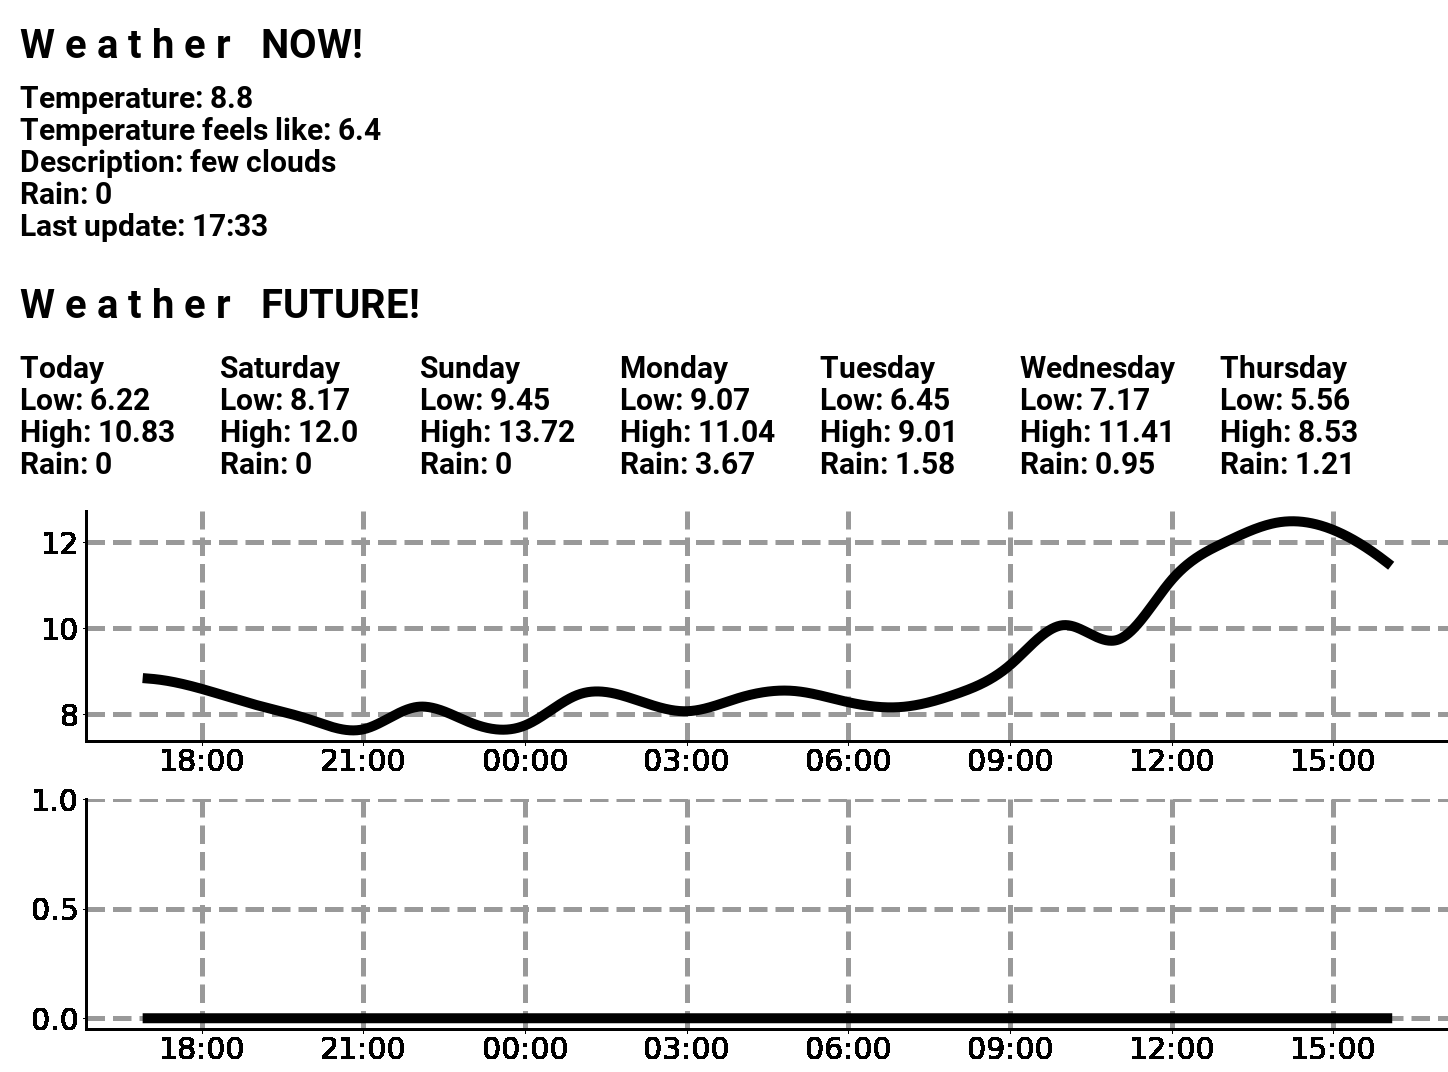

In [8]:
create_forecast_image(
    hourly_plot=convert_plt_fig_to_pil(h_plot),
    daily_text=d_text,
    current_text=c_text,
    font_path='rpi_weather_display/fonts/Roboto-Bold.ttf'
)